In [122]:
import numpy as np
import pandas as pd
from sklearn import cluster, manifold, decomposition
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import util
import torch.nn.functional as F

data_path = Path(".") / "data"
combined_clue_path = data_path / "combined_clues"
clue_path = combined_clue_path / os.listdir(combined_clue_path)[0]


In [136]:
embeddings = np.load(clue_path / "embeddings.npy")
clues = pd.read_csv(clue_path / "clues.csv", header=0).dropna().reset_index(drop=True)

In [178]:
N = 50_000
# mds_embeddings = manifold.MDS(n_components=30, dissimilarity="precomputed").fit_transform(1-util.pytorch_cos_sim(embeddings[:N], embeddings[:N]))
pca_embeddings = decomposition.PCA(n_components=2).fit_transform(embeddings[:N])
# tsne_embeddings = manifold.TSNE(n_components=2).fit_transform(pca_embeddings)

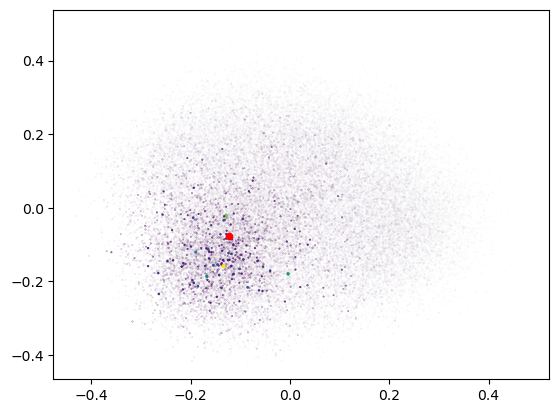

In [195]:
i = 9
def get_probs(i, embeddings):
    similarities = 20 * util.cos_sim(embeddings[i], embeddings[:N])[0]
    similarities[i] = -np.inf
    return F.softmax(similarities, dim = -1)
similarities = get_probs(i, embeddings)
embedding_to_plot = pca_embeddings
plt.scatter(embedding_to_plot[:, 0], embedding_to_plot[:, 1], s=similarities * 100, c=similarities)
plt.scatter(embedding_to_plot[i, 0], embedding_to_plot[i, 1], s=20, c='r')

In [196]:
clues_by_similarity = clues.loc[np.argsort(-similarities, axis=-1)].merge(pd.Series(similarities, name="similarity"), left_index=True, right_index=True)
print(f"Category: {clues.loc[i, 'category']}, Question: {clues.loc[i, 'question']}, Response: {clues.loc[i, 'response']}")
clues_by_similarity

Category: POTENT POTABLES, Question: Though most today don't drink because of Muslim law, these people first discovered distillation, Response: the Arabs


,category,question,response,similarity
36085,POTENT POTABLES,"Cocktails with ""London"" in their names are oft...",gin,4.116629e-02
25834,POTENT POTABLES,This liquor that originated in the West Indies...,rum,3.291128e-02
180,POTENT POTABLES,Don the Beachcomber claims to have invented th...,a Zombie,2.571842e-02
24101,POTENT POTABLES,"From Old French for ""liquid"", term for alcohol...",liqueur,2.030049e-02
47057,POTENT POTABLES,This Scandinavian liquor is made by redistilli...,aquavit,1.597248e-02
...,...,...,...,...
29276,1929,This aviation hero married Anne Spencer Morrow...,Charles Lindbergh,8.456796e-09
24956,THE CIVIL WAR,In Nov. 1863 Edward Everett gave the long orat...,Gettysburg,7.202278e-09
26783,PRESIDENTS,"In the novel ""1876""Gore Vidal's narratorcalls ...",Rutherford B. Hayes,5.798900e-09
3281,PENNSYLVANIA,A 307-foot observation tower overlooks the sit...,Gettysburg,4.830873e-09


In [105]:
matching_clues = pd.Series(util.cos_sim(embeddings[3], embeddings)[0] > 0.45)

In [106]:
clues.iloc[2]

category                                       KINGS & QUEENS
question    King Tut's tomb as well as many others have be...
response                              the Valley of the Kings
Name: 2, dtype: object

In [107]:
clues.dropna().reset_index(drop=True)[matching_clues]

,category,question,response
3,SPORTS,Sporting event held in years 392 & 1896 but no...,the Olympics
562,SPORTS,"This American man won 5 gold medals, a silver ...",Matt Biondi
563,SPORTS,The 1992 Winter Olympics in this French city w...,Albertville
735,U.S. STATES,It held the World's Fair in '39 & '40 & anothe...,New York
1704,SPORTS,"Sergei Bubka, the world record holder in this ...",the pole vault
...,...,...,...
48419,MISCELLANEOUS KNOWLEDGE,"More than 6,000 athletes from some 40 countrie...",the Pan American Games
48529,AWARDS & HONORS,In the early 20th c. these were given out for ...,Olympic medals
48685,40 YEARS AGO: 1984,"At the Winter Olympics, this American won gold...",Scott Hamilton
49218,OLYMPIC HISTORY,This sport got ugly in 1956 as recently invade...,water polo
